In [ ]:
import pickle
user = {'name':'Andrew K. Johnson', 'score': 199, 'location':[38.189323, 127.3495672]}
D
# save data
with open('user.pickle','wb') as fw:
    pickle.dump(user, fw)

In [ ]:
import requests
import pprint
import pandas as pd
from collections import Counter
import csv


pp = pprint.PrettyPrinter(indent=4)
api_key = 'RGAPI-755961b7-64d0-4cec-aca6-7985badb0a00'
# game_id = 'KR_6261112670'
lines = ['TOP', 'BOTTOM', 'MIDDLE', 'JUNGLE', 'UTILITY']

request_header={
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.61 Safari/537.36",
    "Accept-Language": "ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com",
    "X-Riot-Token": api_key
}

f = open('챌경기.csv','r')
rdr = csv.reader(f)
header = next(rdr)

def get_match_v5_orderby_kda(game_id):   
    summoner_api = 'https://asia.api.riotgames.com/lol/match/v5/matches/' + game_id
    r = requests.get(summoner_api,headers=request_header)
    df=pd.DataFrame(r.json())
    if (df.empty): return False, False
    try:
        part_df = pd.DataFrame(df['info']['participants']);
        version = df['info']['gameVersion']
        # 조건 : 이겼는가
        if (part_df.empty): return False, False
        is_win = part_df['win']==True
        rank = dict()
        # 라인별 KDA 구하기
        print(f'--{temp}번째 요청--')
        for line in lines:
            doco_line = part_df['individualPosition']==line
            if (part_df[is_win & doco_line].empty):
                continue
            kda = pd.DataFrame(part_df[is_win & doco_line])['challenges'].iloc[0]['kda']
            print(kda)
            rank[line] = kda
        print('----')
        return rank, version
    except KeyError:
        return False, False


result = dict()
temp = 0
# TODO :: range 대신 game id 리스트로 수정
for row in rdr:
    game_id = row[0]
    temp = temp + 1
    rank, version = get_match_v5_orderby_kda(game_id)
    if (rank is False):
        continue
    if (not version in result):
        result[version] = dict()
    result[version] = dict(Counter(result[version])+Counter(rank))


# 라인별 KDA 정렬하기
# result = dict(sorted(result.items(), key = lambda item: item[1], reverse = True))
result

[30, 60, 43.99999999999999, 26.000000000000004, 26.666666666666668]


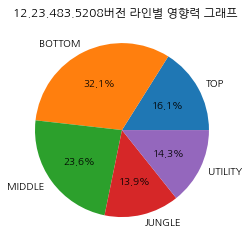

In [55]:
import matplotlib.pyplot as plt

labels = []
ratio = []
season = "13"

for key, val in result.items():
    for line, kda in val.items():
        labels.append(line)
        ratio.append(kda)
    plt.rc('font', family='NanumGothic')
    plt.pie(ratio, labels=labels, autopct='%.1f%%')
    plt.title(label=f"{key}버전 라인별 영향력 그래프",
        loc="left",
        fontstyle='italic')
    plt.show()
    labels = []
    ratio = []